In [1]:
import pandas as pds
from pymatgen.util.plotting import pretty_plot
%matplotlib inline

df = pds.read_csv("./weight.csv", sep=";\s+", index_col=None, engine='python')
df.fillna(value="lbs", inplace=True)

KG_2_LBS = 2.20462 # lbs/kg

def calculate_weight(row):
    if row["unit"] == "lbs":
        return row['value']
    else: # row["unit"] == "kg"
        return row["value"] * KG_2_LBS
    
df["weight"] = df.apply(calculate_weight, axis=1)
df

,date,value,unit,weight
0,2018-06-05,17.80,lbs,17.800000
1,2018-06-11,15.12,lbs,15.120000
2,2018-06-16,15.60,lbs,15.600000
3,2018-06-19,15.90,lbs,15.900000
4,2018-06-20,15.65,lbs,15.650000
5,2018-06-21,15.43,lbs,15.430000
6,2018-06-22,15.43,lbs,15.430000
7,2018-06-23,16.09,lbs,16.090000
8,2018-06-24,16.09,lbs,16.090000
9,2018-06-25,15.87,lbs,15.870000


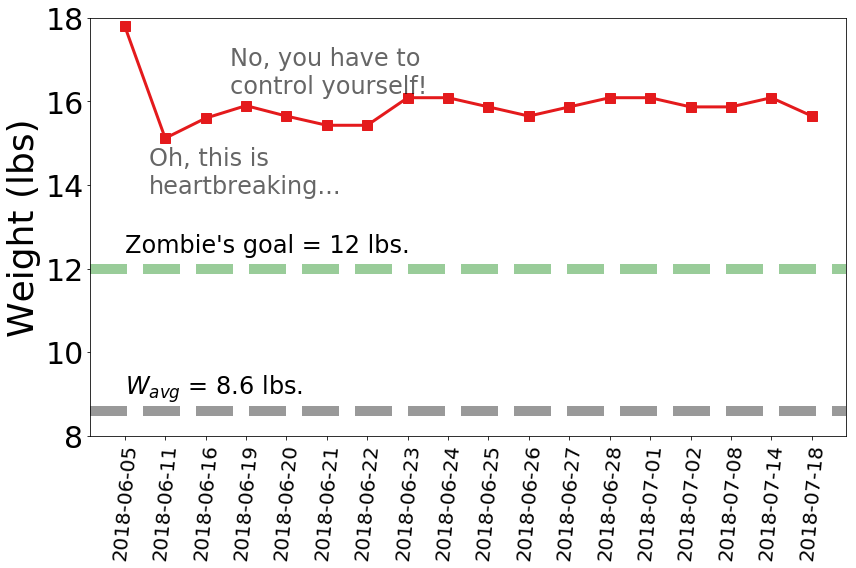

In [2]:
p = pretty_plot(12, 8)
p.plot(df["date"], df['weight'], marker="s", ms=10, lw=3)

p.xticks(rotation=85, fontsize=20);
p.ylabel("Weight (lbs)")
# p.title("Zombie weight change over time", fontsize=28);

# My comments
fs = 24
font = {"alpha": 0.6, "fontsize": fs}

p.annotate(s="Oh, this is \nheartbreaking...", xy=(0.6, 13.8), **font)
p.annotate(s="No, you have to \ncontrol yourself!", xy=(2.6, 16.2), **font)

# the average weight of the adult un-neutered male (tom) is 8.6 pounds
p.axhline(y=8.6, ls="--", lw=10, alpha=0.4, c="k")
p.annotate(s="$W_{avg}$ = 8.6 lbs.", xy=(0, 9), fontsize=fs)

# the goal for Zombie
p.axhline(y=12, ls="--", lw=10, alpha=0.4, c="g")
p.annotate(s="Zombie's goal = 12 lbs.", xy=(0, 12.4), fontsize=fs)

p.ylim(8, 18)
p.tight_layout()
# p.savefig("Zombie-weight.pdf")